In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rd
import cv2
import aligner as temp_a
from aligner import Aligner
from importlib import reload
reload(temp_a)

<module 'aligner' from 'c:\\Users\\pedro\\Desktop\\Projetos\\Face-Detection-Recognition\\aligner.py'>

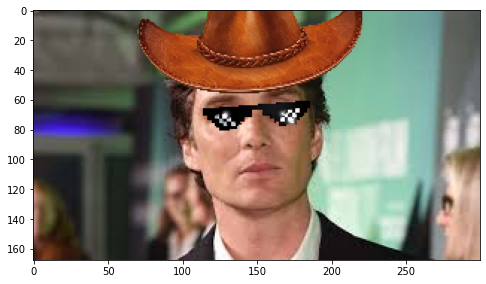

In [3]:
face = cv2.imread('cillian/cillian08.jpg')
hat = cv2.imread('objects/cowboy.jpg')
glasses = cv2.imread('objects/glasses.jpg')

# Hat eye center
hat_left_eye_center = (580, 560)
hat_right_eye_center = (740, 560)

# Glasses eye center
glasses_left_eye_center = (410, 350)
glasses_right_eye_center = (870, 350)

"""cv2.rectangle(glasses, hat_left_eye_center,
              hat_left_eye_center, (255, 0, 0), 10)
cv2.rectangle(glasses, hat_right_eye_center,
              hat_right_eye_center, (255, 0, 0), 10)
cv2.imshow('mask', glasses)

while cv2.waitKey(20) & 0xFF != ord('q'):
    pass"""
    
a = Aligner()
hat_normalized = a.alignObjectToFace(hat, face, hat_left_eye_center, hat_right_eye_center)
glasses_normalized = a.alignObjectToFace(
    glasses, face, glasses_left_eye_center, glasses_right_eye_center)

## convert to hsv
glasses_hsv = cv2.cvtColor(glasses_normalized, cv2.COLOR_BGR2HSV)
hat_hsv = cv2.cvtColor(hat_normalized, cv2.COLOR_BGR2HSV)

## mask of green (36,25,25) ~ (86, 255,255)
glasses_mask = cv2.inRange(glasses_hsv, (36, 25, 25), (86, 255, 255)) / 255
hat_mask = cv2.inRange(hat_hsv, (36, 25, 25), (86, 255, 255)) / 255

## convert to rgb array of ints
glasses_mask = np.array(np.ones((glasses_mask.shape[0], glasses_mask.shape[1], 3)) * glasses_mask[:, :, None], dtype=int)
hat_mask = np.array(np.ones((hat_mask.shape[0], hat_mask.shape[1], 3)) * hat_mask[:, :, None], dtype=int)

"""print(face.shape) # original face
print(hat_mask.shape) # hat mask (mask area = 0)
print(hat_normalized.shape) # hat normalized (positioned with green screen)"""

final = face * hat_mask + hat_normalized * np.logical_not(hat_mask)
final = final * glasses_mask + glasses_normalized * np.logical_not(glasses_mask)

plt.figure(figsize=(8, 10))
plt.imshow(final[:,:,::-1])
